<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity-Integration-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical Integration

Numerical integration is a particularly important method in computational physics.  Integrals appear widely in physics, and there are many cases where you might want to integrate some observable (such as integrating the velocity of an object to get the displacement).  Also, while some integrals can be solved analytically, many can not.  In those cases, numerical integration can be particularly powerful for solving a given physics problem.

Today, we'll start looking at methods of numerical integration. We'll focus on one-dimensional integrals, although the methods we develop can be applied in higher dimensions.  

## Trapezoidal rule

Take a function $f\left(x\right)$ that you want to calculate the integral of over a range from $x=a$ to $x =b$.  We would write that as:

$
I\left(a,b\right) = \int_a^b f\left(x\right) dx
$

Remember that this is akin to calculating the area under the curve from points $a$ to $b$.  

There are a few ways one could approach calculating this area.  The first is to just draw one big rectangle under the box.  That could work, but unless $f(x)$ was pretty flat, it wouldn't be very accurate.  An improvement comes if you divided up the area between $a$ and $b$ into smaller areas, which we'll call *slices*, and in each of those draw a box and then add up the area of each of those boxes.  This is shown in figure (a) below.

While that will work, its not highly accurate. You can make a more accurate  estimate of the area under the curve by drawing trapazoids instead of squares.  For example, compare area in the grey boxes in figures (a) and (b) below.  In the second one, the area in grey is closer to the area under the curve, even with the same number of slices.  Increasing the number of slices will futher increase the accuracy, as shown by comparing figures (b) and (c) below.
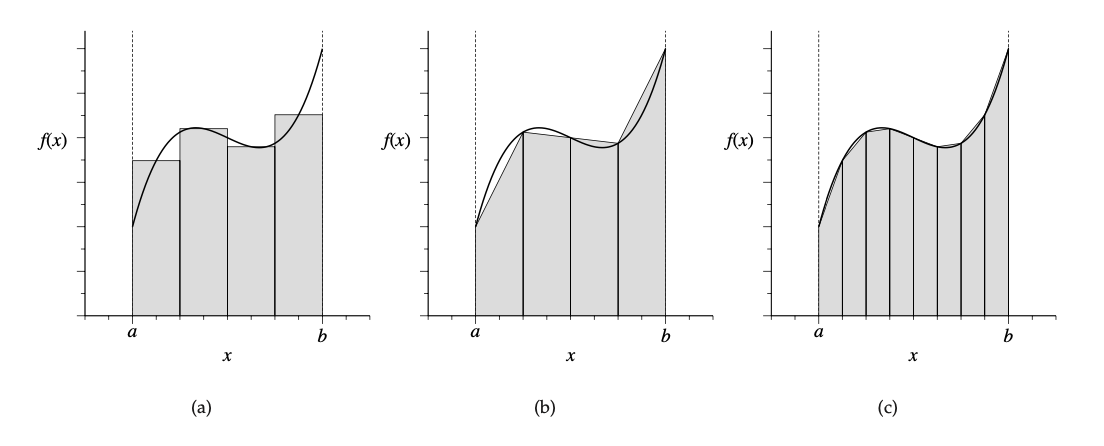
(Image from Mark Newman's Computational Physics text)


To implement the trapezoidal rule, we first divide the area between points $a$ and $b$ into $N$ equal sized slices (for example, $N = 4$ in figure (b) above).  Each slice will have a width of:

$h = \frac{b-a}{N}$

The $k$th trapezoid will have a right-hand side located on the x-axis at $a+kh$, and a left hand size located at $a+(k-1)h$.  

** Activity:** Take the case where you are integrating a function from $a = 1.0$ to $b = 2.0$, and you divide the space up into $N=4$ slices.  By hand, determine the left and right positions of the four trapezoids:

k          left_hand-side          right_hand_side

1              1.0                     1.25

2              1.25                    1.5

3              1.5                     1.75

4              1.75                    2.0



We can compute the area for the $k$th trapezoid using the standard formula for a trapezoid's area:

$A_k = \frac{h}{2} \left[f\left(a+\left(k-1\right)h\right) + f\left(a+kh\right)\right]$

If we want to estimate the total area under the curve, we need to add up the area of each trapezoid.  To do that, we can write:

$
I\left(a,b\right) = \int_a^b f\left(x\right) dx \approx \sum_{k=1}^N A+k = \sum_{k=1}^N \frac{h}{2} \left[f\left(a+\left(k-1\right)h\right) + f\left(a+kh\right)\right]
$

If you expand the sum out you get:

$I\left(a,b\right)  \approx h \left[ \frac{1}{2}f\left(a\right) +f\left(a+ h \right) +f\left(a+ 2h \right)+...+ \frac{1}{2}f\left(b\right)\right]$

Which we can rewrite as:

$I\left(a,b\right)  \approx h \left[ \frac{1}{2}f\left(a\right) +\frac{1}{2}f\left(b\right) + \sum_{k=1}^{N-1} f\left(a+ k h \right) \right]$.

### Activity:

Implement trapezoidal integration for the function 

$
f\left(x\right) = x^5 + 3\cdot x^3 + 2
$

for $1\leq x \leq  5$. Use $N=10$ slices.  To do that, note the algorithm we have developed:

1.  Determine the value of $h$, the width of the trapezoids.  
2.  Create an array of equally spaced points that range from $a$ to $b$ with a spacing of $h$.
3.  Create another array with the function values at each of these points.
4.  Add up the values of the function at each point.  For the end points ($x=a$ and $x=b$, only add half the value).  Multiple the resulting sum by $h$.


Calculate the exact result analytically.  How does your answer compare to the exact result?  

Once you have done the above, try changing the number of slices.  Use $N=2, 5, 10, 50, 100$.  How does this change your results?



In [1]:
import numpy as np 

User defined variables

a: minimum value of integral range

b: maximum value of integral range

N: number of slices


In [2]:
a = 1.0
b = 5.0
N = 10

Function for the function being integrated.  Also a function for the analytic result.

In [3]:
def f(x):
  return x**5.0 + 3.0*x**3.0 +2.0

def f_I(x):
  return 1.0/6.0 * x**6.0 + 3.0/4.0*x**4.0 +2.0*x

First calculate h.  Then create arrays for $x$ and $y$.  Add up $y$ values.  Note that if you use the sum approach I'm using below, you overcount the endpoints by a factor of 1/2, so I'm just subtracting those off after.  You could do all of this differently in a loop if you wanted. Finally, multiply by $h$.

In [4]:
h = (b-a) / N 
x = np.linspace(a,b,N+1,endpoint=True) #Note the N+1 is because for N trapezoids, you need N+1 points
y = f(x)
integrand = h * (np.sum(y) - 0.5*(y[0]+y[-1]))
print("The integrand is approximately:", integrand)

exact_integral = f_I(b)-f_I(a)
print("The integrand is exactly:", exact_integral)


The integrand is approximately: 3124.4288
The integrand is exactly: 3080.0


Note that there are other ways to calculate the integrand using array operations.  Here's one that fairly compact....can you tell why it works?

In [5]:
h=np.full(N+1,(b-a) / N )
h[0] *= 0.5
h[-1] *= 0.5
x = np.linspace(a,b,N+1,endpoint=True) #Note the N+1 is because for N trapezoids, you need N+1 points
y = f(x)
integrand = np.sum(h*y)
print("The integrand is approximately:", integrand)

exact_integral = f_I(b)-f_I(a)
print("The integrand is exactly:", exact_integral)


The integrand is approximately: 3124.4288
The integrand is exactly: 3080.0


##Simpson's Rule

The trapezoid rule effectively models the curve being integrated as a series of linear segments between two points.  As we saw when discussing interpolation, we can do a better job of this by instead using local polynomials between points.  For example, compare this figure to the one's up above:

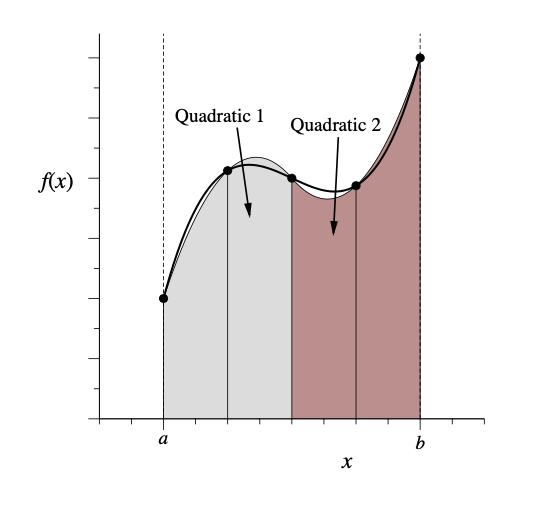


Here, we are taking the first two slices and making a quadratic function out of their points, then taking the next two slices and making another quadratic function from those points.  By integrating under each of these quadratics and adding the result, we can approximate the integral under the original function $f(x)$.

To do this, suppose we have three points for our function, which are located at $x = -h, 0, h$.  If we fit them to a quadratic of the form $A x^2 + Bx + C$ we can get:

$f\left(-h\right) = A h^2 - B h + C$

$f\left(0\right) = C$

$f\left(h\right) = A h^2 + B h + C$

If you solve these for $A$, $B$, and $C$, you get:

$ A = \frac{1}{h^2}\left[\frac{1}{2}f\left(-h\right) - f\left(0\right) + \frac{1}{2}f\left(h\right)\right]$

$B = \frac{1}{2h} \left[f\left(h\right) - f\left(-h\right)\right]$,

$C = f\left(0\right)$.

To calculate the area under this curve, integrate this quadratic function from $-h$ to $h$:

$
\int_{-h}^{h} \left(A x^2 + B x + C\right)dx = \frac{2}{3}A h^3 + 2 C h = \frac{h}{3} \left[ f\left(-h\right) + 4 f\left(0\right) +f\left(h\right) \right]
$

Take a moment to make sure you understand what this is saying.  If you want to approximate a curve by three points and calculate the area under it, you can do that by knowing the values of the function at the two extremes ($f\left(-h\right)$ and $f\left(h\right)$), and the value in the middle ($f\left(0\right)$), and using the above formula. You don't need to actually fit the quadratic function to the points, our derivation above has done that for you!  The formula above is *Simpson's rule*.

Just like with the trapezoidal rule, if we want to apply Simpson's rule to the full range of a function, we slice our x-axis up and apply Simpson's rule in chunks.  Then we add up the result.  If we are integrating from $a$ to $b$ with points spaced every $h$ distance, then our first three points will be $x=a, a+h, a+2h$, our second three will be $x = a+2h, a+3h, a+4h$, etc.  The approximation for the full integral will then be:

$I\left(a,b\right) \approx \frac{h}{3} \left[ f\left(a\right) + 4 f\left(a+h\right) +f\left(a+2h\right) \right] + \frac{h}{3} \left[ f\left(a+2h\right) + 4 f\left(a+3h\right) +f\left(a+4h\right) \right] + ... + \frac{h}{3} \left[ f\left(a+\left(N-2\right)h\right) + 4 f\left(a+\left(N-1\right)h\right) +f\left(b\right) \right]$

This looks messy, but we can clean it up by grouping together terms that have the same leading term to get:

$I\left(a,b\right) \approx \frac{h}{3} \left[ f\left(a\right) + f\left(b\right) + 4\sum_{k odd, 1}^{N-1} f\left(a+kh\right)+2\sum_{k odd, 2}^{N-2} f\left(a+kh\right)\right]$.

This is only a bit more complicated than our trapezoidal rule above.

### Activity:

Repeat the above activity for calculating the integral of:

$
f\left(x\right) = x^5 + 3\cdot x^3 + 2
$

for $1\leq x \leq  5$. Use $N=10$ slices. But this time use Simpson's Rule.  Howe do the results compare?  If you have time, compare your final answers with $N=2, 5, 10, 50, 100, 1000$ with the trapezoidal and Simpson's rules.


In [6]:
import numpy as np 

User defined variables

a: minimum value of integral range

b: maximum value of integral range

N: number of slices


In [7]:
a = 1.0
b = 5.0
N = 10

Function for the function being integrated.  Also a function for the analytic result.

In [8]:
def f(x):
  return x**5 + 3.0*x**3 +2.0

def f_I(x):
  return 1.0/6.0 * x**6 + 3.0/4.0*x**4 +2.0*x

First calculate h.  Then create arrays for $x$ and $y$.  I'll do this integral in a loop by adding to the value of $integrand$ as I go.  You could do all of this differently in a loop if you wanted. Finally, multiply by $h$.

In [9]:
h = (b-a) / N 
x = np.linspace(a,b,N+1,endpoint=True) #Note the N+1 is because for N trapezoids, you need N+1 points
y = f(x)
integrand = y[0] + y[-1] #add the first and last elements
for i in range(1,N):
  if i%2 == 1: 
    integrand += 4 * y[i]
  if i%2 == 0:
    integrand += 2 * y[i]
integrand *= h/3.0
print("The integrand is approximately:", integrand)

exact_integral = f_I(b)-f_I(a)
print("The integrand is exactly:", exact_integral)


The integrand is approximately: 3080.2048
The integrand is exactly: 3080.0
